<a href="https://colab.research.google.com/github/nicolasvargaszz/Kaggle_depresion_dataset/blob/main/Depresion_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
pip install scikit-plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scikitplot.metrics import plot_confusion_matrix, plot_roc

ModuleNotFoundError: No module named 'scikitplot'

In [5]:
df = pd.read_excel("dataset_depresion.xlsx")

In [7]:
df.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [9]:
df.shape
df.isnull().sum()

(6982, 2)

In [18]:
df.dropna(inplace=True)
df

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0
...,...,...
6977,I can't forget you #SpiritHadrian,0.0
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0.0
6979,Dai5y! <3,0.0
6980,tired of clowns but still hopefully tonight if...,0.0


In [21]:
df["label"].value_counts()

,count
label,
0.0,6240
1.0,730


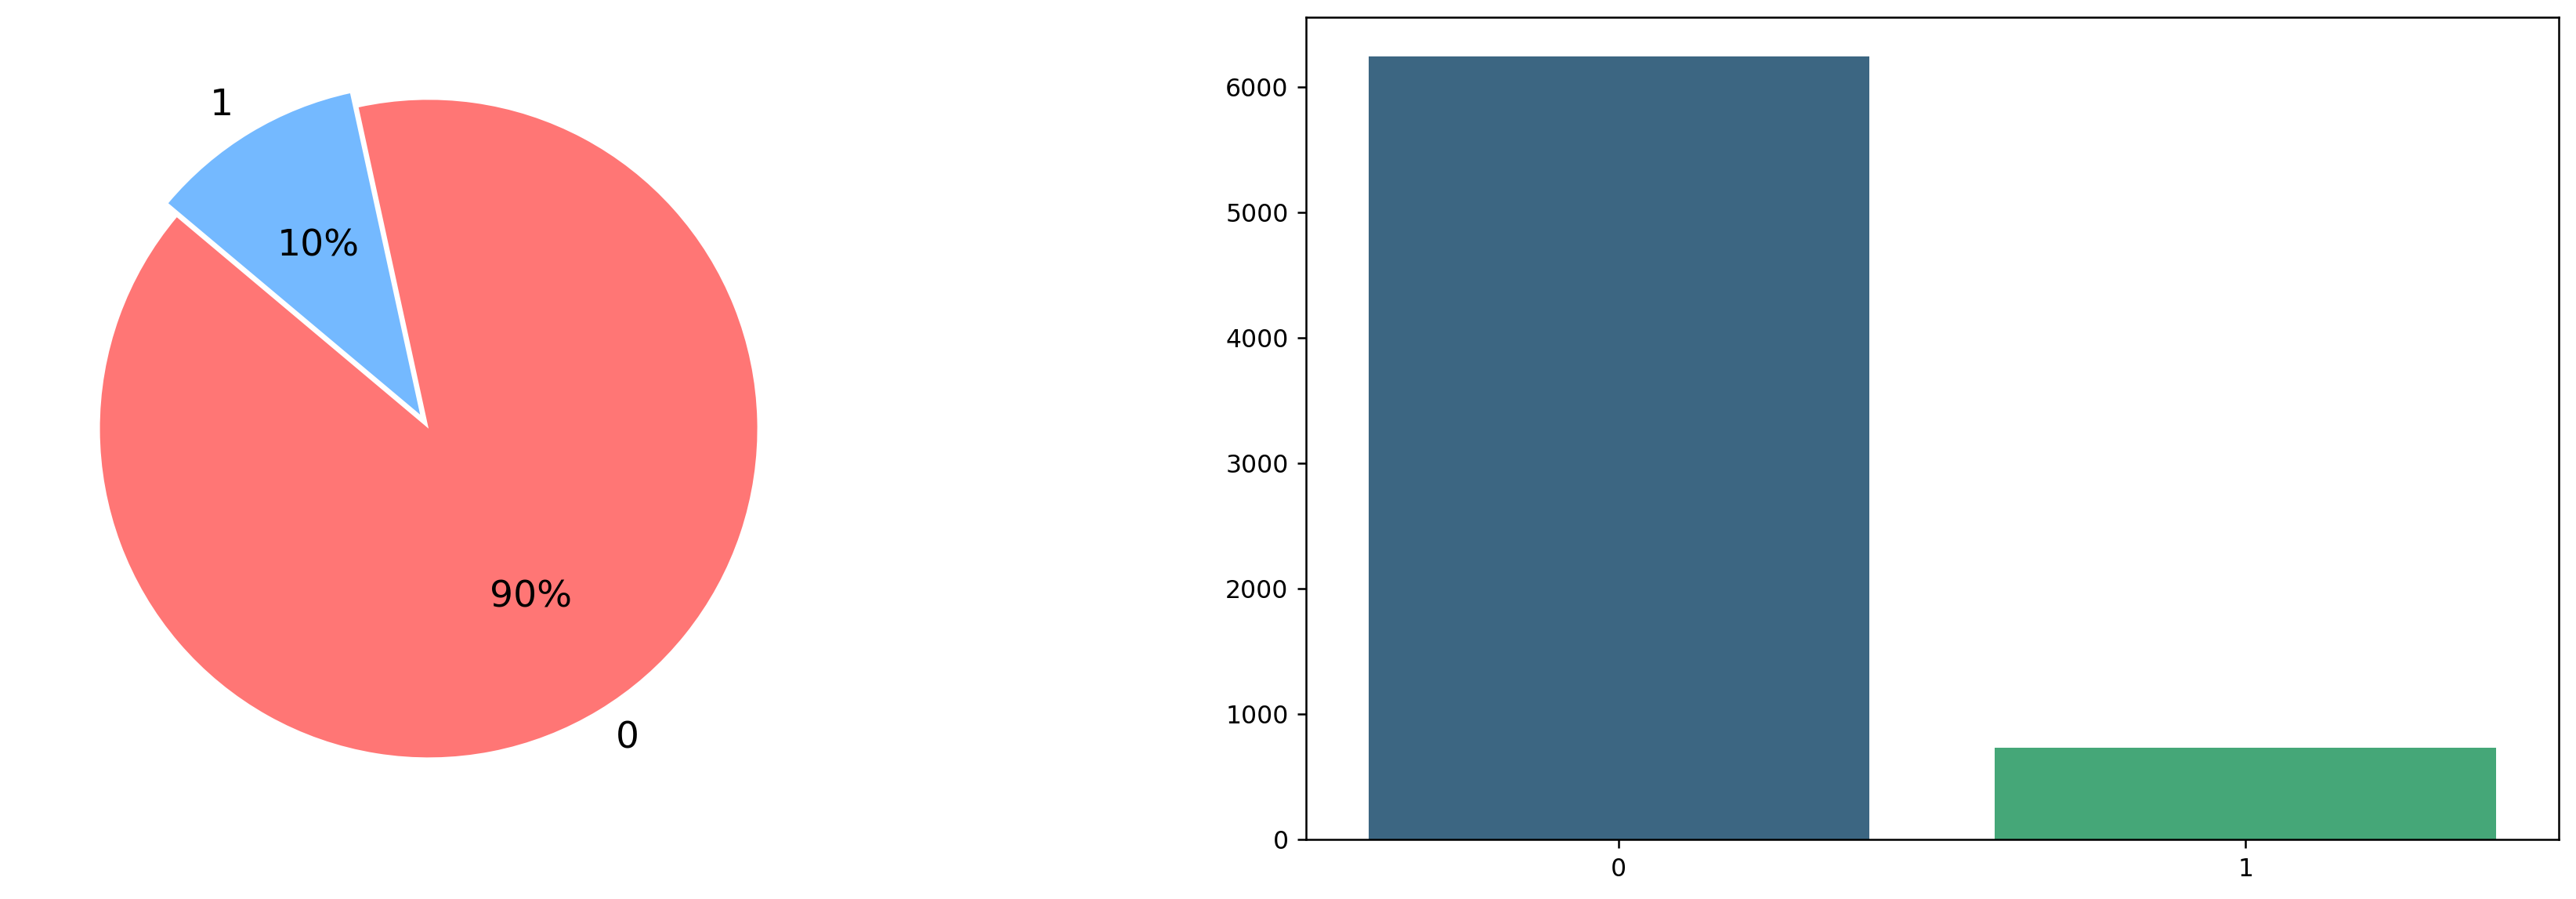

In [22]:
labels = [0,1]
sizes = [6240, 730]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x=labels,y = sizes, palette= 'viridis')

plt.show()

In [38]:
df["Words"] = df["text"].apply(lambda x: len(x.split()))


def total_char(text):
  char = 0
  for i in text.split():
    char += len(i)
  return char

df['Total Chars'] = df["text"].apply(total_char)
df.head()




,text,label,Words,Total Chars
0,oh my gosh,1.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14,65
3,I've shifted my focus to something else but I'...,1.0,11,51
4,"I'm restless and restless, it's been a month n...",1.0,14,59


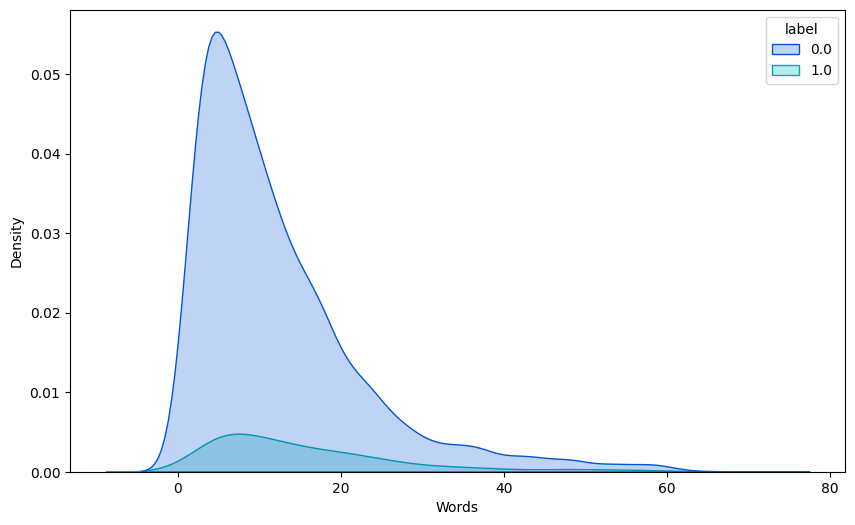

In [41]:

plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['Words'], hue= df['label'], palette= 'winter', shade = True)
plt.show()

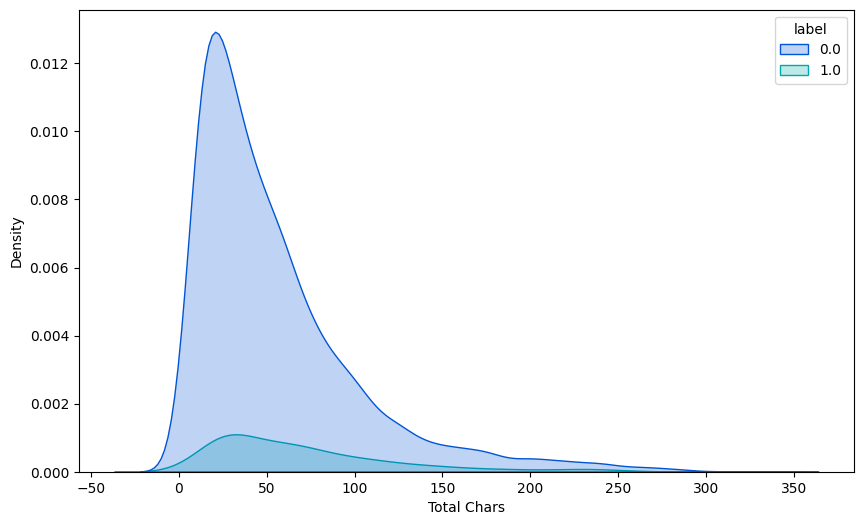

In [42]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['Total Chars'], hue= df['label'], palette= 'winter', shade = True)
plt.show()

In [43]:
def convert_lowercase(text):
  return text.lower()

df['text'] = df['text'].apply(convert_lowercase)
df.head()

,text,label,Words,Total Chars
0,oh my gosh,1.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"all wrong, back off dear, forward doubt. stay ...",1.0,14,65
3,i've shifted my focus to something else but i'...,1.0,11,51
4,"i'm restless and restless, it's been a month n...",1.0,14,59


In [45]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df['text'] = df['text'].apply(remove_url)

NameError: name 're' is not defined